# What is Portfolio Optimization and Why Should You have  It?
Portfolio optimization is the process of strategically grouping investments in a way that maximizes returns while minimizing risks. Instead of randomly selecting assets, it uses mathematical and statistical methods to find the best mix of investments that align with your financial goals.

### Why Should You Use Portfolio Optimization?
**- Balancing Risk and Reward:**
It helps you find the ideal tradeoff between earning more and avoiding losses.
Example: If you want steady income, it might suggest adding bonds. If you want growth, it might recommend stocks.

**- Diversification:**
Optimized portfolios spread risk by including assets that behave differently, reducing the chance of large losses.

**- Data-Driven Decisions:**
Instead of guessing, you use data (like returns, risks, and correlations) to make smarter investment choices.

**- Customizable to Goals:**
Whether you’re saving for retirement or buying a house, portfolio optimization adjusts to your time horizon and risk tolerance.



In [1]:
!pip install quantstats

In [2]:
!pip install ta

In [3]:
!pip install pyportfolioopt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data
import datetime
# Finance libraries
import quantstats as qs
import ta
import yfinance as yf
# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel



In [5]:
import yfinance as yf

start_date = datetime.datetime(2020, 1, 1)

# Define tickers
stk_tickers = [
    'AAPL', 'TSLA' , 'NVDA' , 'MSFT' , 'UNH'
]

# Fetch data using yfinance
stk_data = yf.download(stk_tickers, group_by="ticker",start=start_date)
stk_data = stk_data.loc[:, (slice(None), 'Adj Close')]



[*********************100%***********************]  5 of 5 completed


In [6]:
stk_data.head()

Ticker,TSLA,NVDA,AAPL,MSFT,UNH
Price,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2020-01-02 00:00:00+00:00,28.684000,5.973121,72.796028,153.630707,272.817413
2020-01-03 00:00:00+00:00,29.534000,5.877517,72.088303,151.717712,270.056641
2020-01-06 00:00:00+00:00,30.102667,5.902164,72.662697,152.109879,271.931427
2020-01-07 00:00:00+00:00,31.270666,5.973620,72.320984,150.722961,270.289856
2020-01-08 00:00:00+00:00,32.809334,5.984824,73.484344,153.123795,275.988708


In [7]:

data = stk_data.loc[:, (stk_tickers, 'Adj Close')]
#Rename the columns
data.columns = stk_tickers

In [8]:
data.head()

,AAPL,TSLA,NVDA,MSFT,UNH
Date,,,,,
2020-01-02 00:00:00+00:00,72.796028,28.684000,5.973121,153.630707,272.817413
2020-01-03 00:00:00+00:00,72.088303,29.534000,5.877517,151.717712,270.056641
2020-01-06 00:00:00+00:00,72.662697,30.102667,5.902164,152.109879,271.931427
2020-01-07 00:00:00+00:00,72.320984,31.270666,5.973620,150.722961,270.289856
2020-01-08 00:00:00+00:00,73.484344,32.809334,5.984824,153.123795,275.988708


In [9]:
#removing the time zone from the date column
data.index = data.index.strftime('%Y-%m-%d')







In [10]:
data.head()

,AAPL,TSLA,NVDA,MSFT,UNH
Date,,,,,
2020-01-02,72.796028,28.684000,5.973121,153.630707,272.817413
2020-01-03,72.088303,29.534000,5.877517,151.717712,270.056641
2020-01-06,72.662697,30.102667,5.902164,152.109879,271.931427
2020-01-07,72.320984,31.270666,5.973620,150.722961,270.289856
2020-01-08,73.484344,32.809334,5.984824,153.123795,275.988708


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1234.0,150.491770,40.342857,54.509769,125.952076,149.774475,175.953465,236.220108
TSLA,1234.0,209.679602,79.553066,24.081333,173.275002,219.245003,257.139992,409.970001
NVDA,1234.0,36.528408,36.010173,4.892763,13.511203,20.693473,44.633823,148.880005
MSFT,1234.0,286.226020,80.119653,129.881042,228.139366,275.336945,331.226570,465.786438
UNH,1234.0,434.158285,96.743909,182.535019,348.170097,469.393219,503.797852,625.250000


- **Highest Average Price:**
UNH (UnitedHealth) has the highest mean price of $433.75, indicating it’s the most expensive stock on average.

- **Lowest Average Price:**
NVDA (Nvidia) has the lowest mean price of $36.44, making it the least expensive stock on average.

- **Most Volatile Stock:**
UNH (UnitedHealth) has the highest standard deviation ($96.52), suggesting significant price fluctuations.

- **Least Volatile Stock:**
NVDA (Nvidia) has the lowest standard deviation ($35.91), indicating relatively stable prices.


## Data visualization

- We will have a visual look at a few aspects in the data

In [12]:
# Reset the index to use Date as a column and modify the original DataFrame
data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

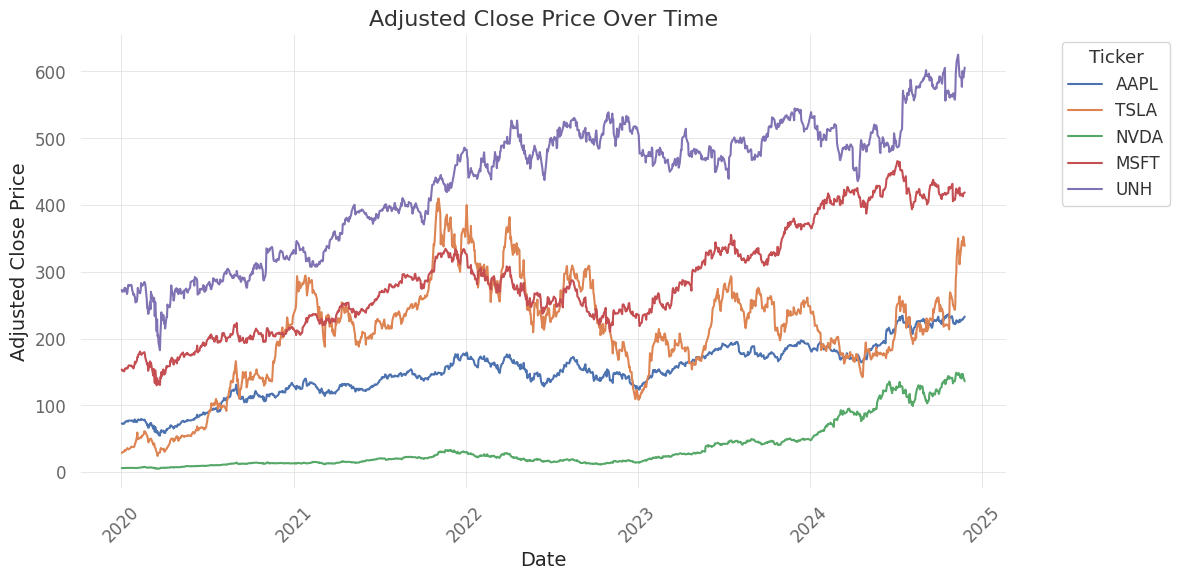

In [13]:
plt.figure(figsize=(12, 6))

# Plot each stock separately
for ticker in data.columns[1:]:  # Skip the Date column
    plt.plot(data['Date'], data[ticker], label=ticker)

# Customize the plot
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- TSLA (Tesla) and UNH (UnitedHealth Group) have the highest adjusted close prices, showing strong growth over time.
- AAPL (Apple) and NVDA (NVIDIA) display consistent long-term price increases, reflecting steady performance.
- MSFT (Microsoft) shows moderate growth over the period.


### Daily returns
- A stock's daily return is the percentual change in price over a single day. You calculate it by subtracting the difference between the stock's closing price on one day and its closing price the day before, dividing the result by the closing of the day before, and multiplying it by 100.
- Daily returns are relevant for investors because they provide a quick way to check the performance of a stock over a short period.


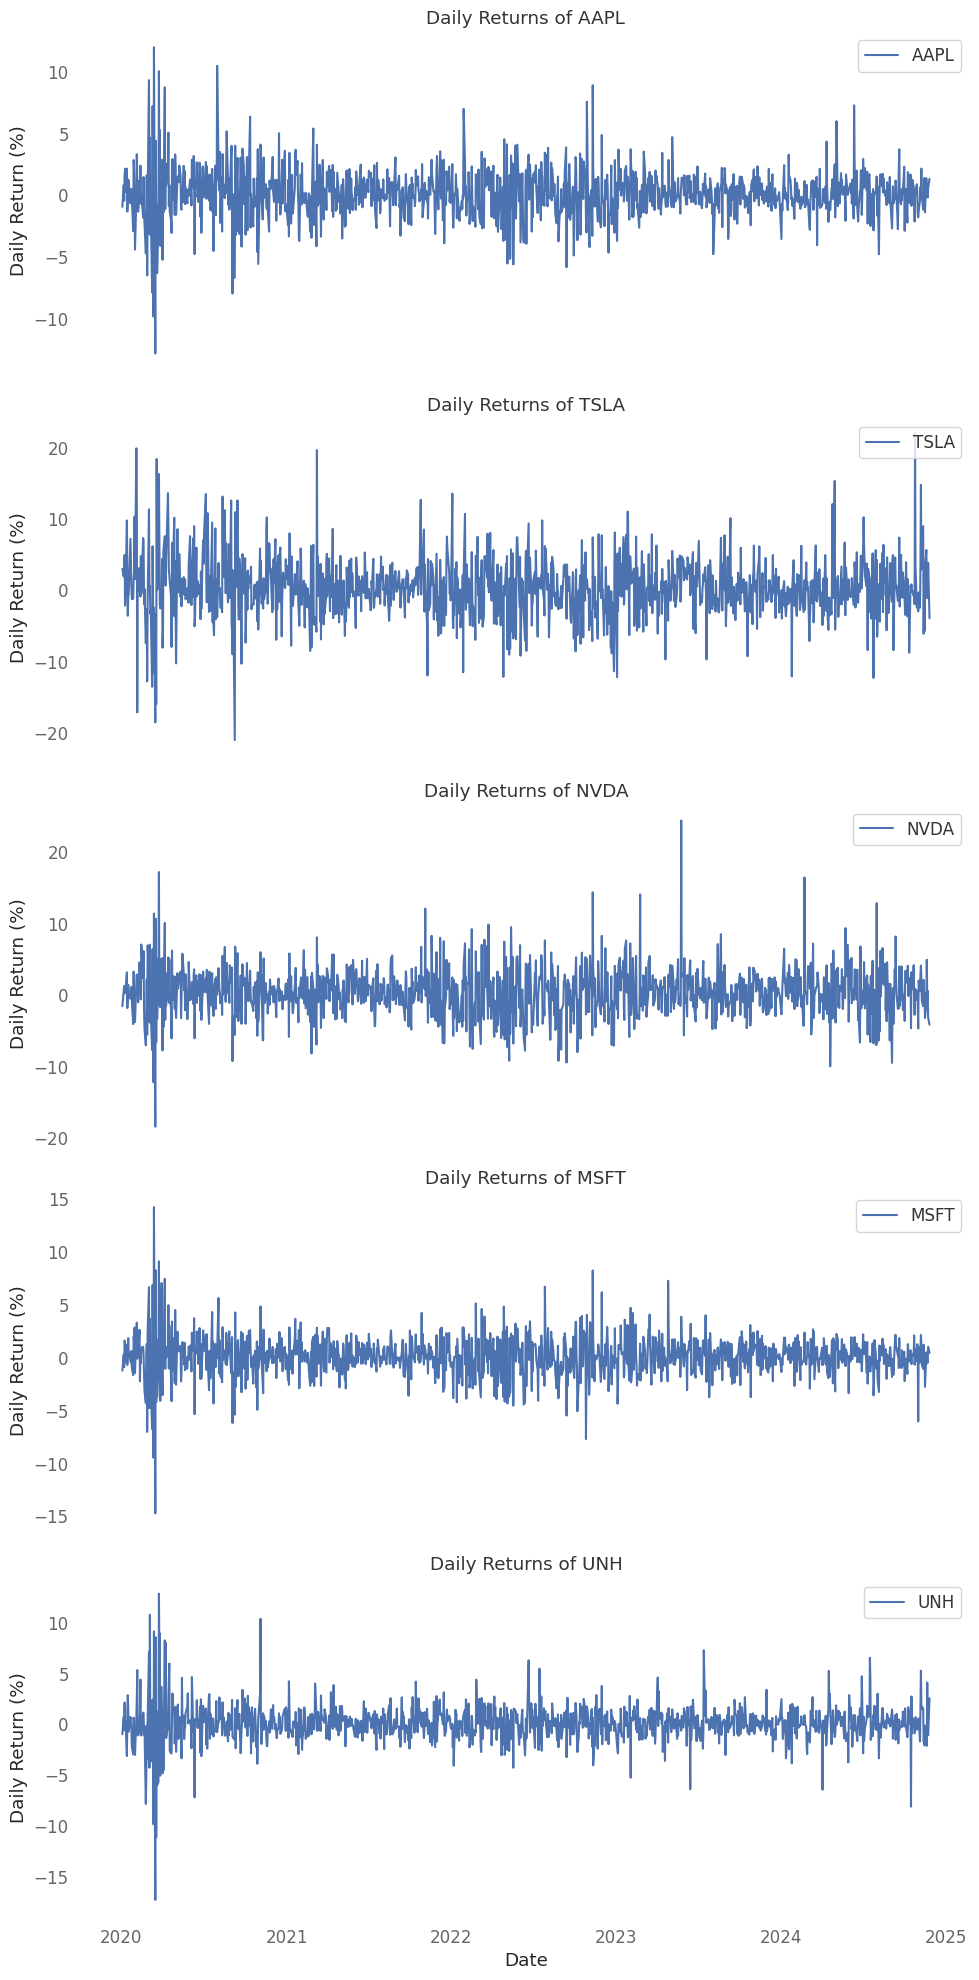

In [14]:
# Exclude the 'Date' column for calculations
daily_returns = data.drop(columns=['Date']).pct_change() * 100

num_stocks = daily_returns.shape[1]

fig, axes = plt.subplots(num_stocks, 1, figsize=(10, 4 * num_stocks), sharex=True)

# Plot each stock's daily returns on its subplot
for i, column in enumerate(daily_returns.columns):
    axes[i].plot(data['Date'], daily_returns[column], label=column)
    axes[i].set_title(f"Daily Returns of {column}")
    axes[i].set_ylabel("Daily Return (%)")
    axes[i].grid()
    axes[i].legend(loc="upper right")


plt.xlabel("Date")
plt.tight_layout()
plt.show()


- NVDA recorded a daily return of  around 20% in 2023.This behavior may indicate high volatility, thus marking it a riskier investment.
- The other stocks perfomed relatively well with a daily return maxing to 15%


### Cumulative return
- Cumulative return takes into account the effects of compounding, meaning that any gains from a previous period are reinvested and contribute to additional gains in future periods, which can result in a larger cumulative return than the simple average of the individual returns over the specified period.




Apple Cumulative Returns Plot



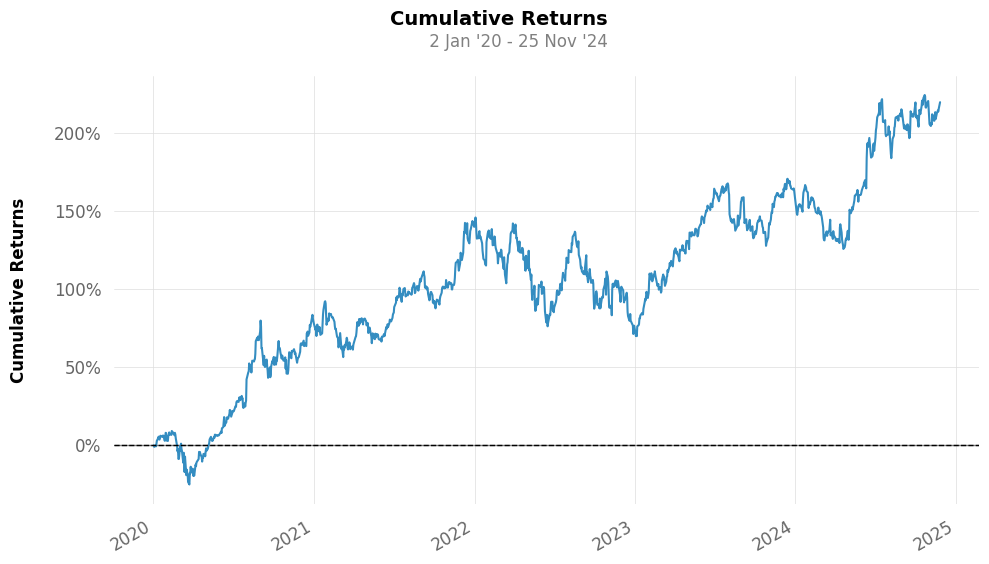






Tesla Inc. Cumulative Returns Plot



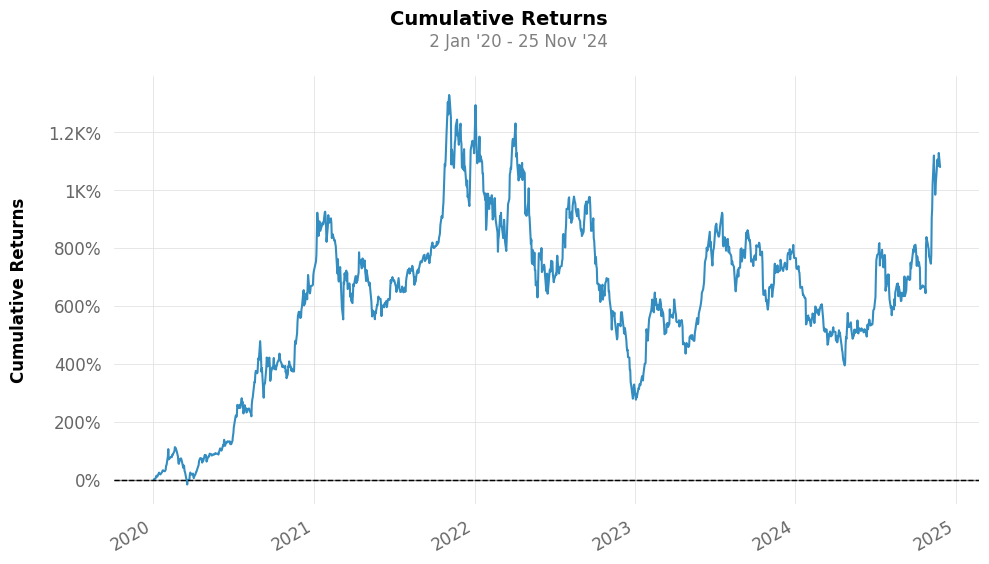






The Nvidia Cumulative Returns Plot



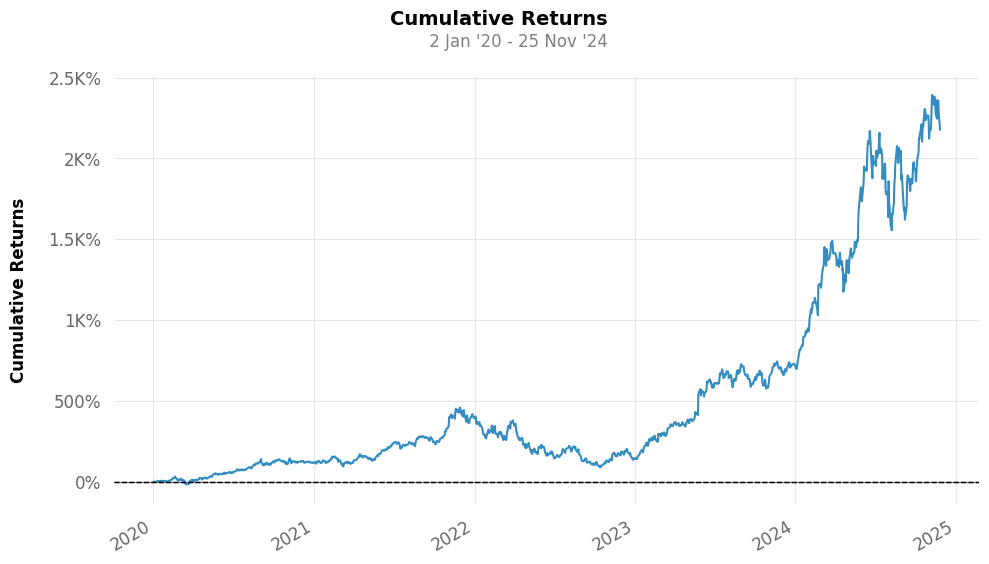






Advances Microsoft Cumulative Returns Plot



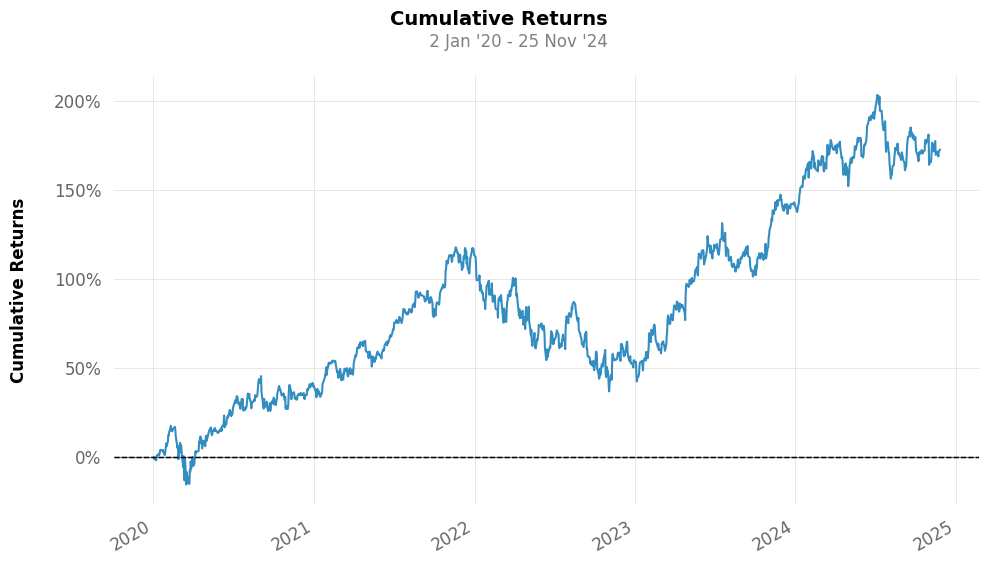






UnitedHealth Group Inc. Cumulative Returns Plot



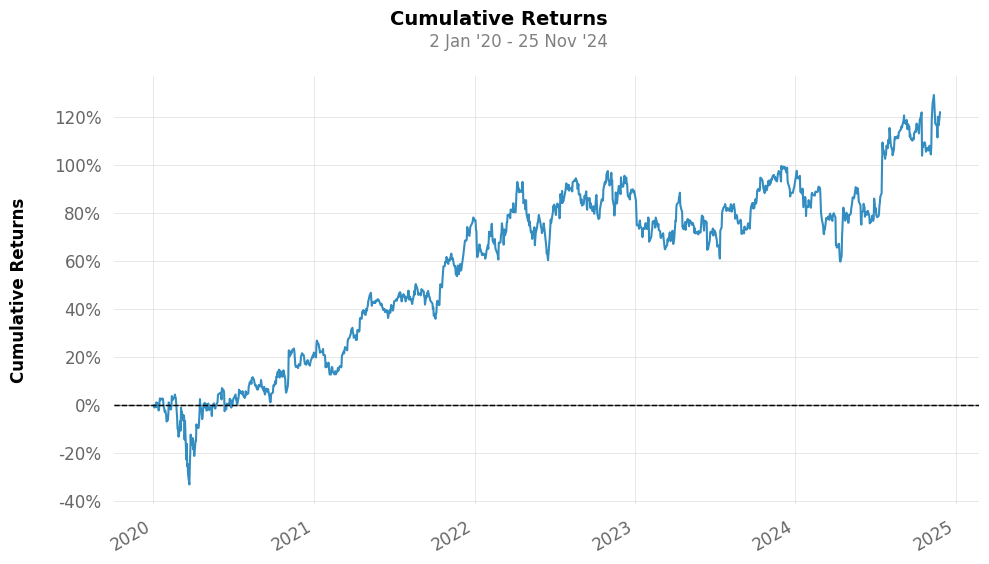

In [15]:
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

# Set 'Date' column as index
data = data.set_index('Date')

# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(data['AAPL'])
print('\n')
print('\n')
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(data['TSLA'])
print('\n')
print('\n')
print('\nThe Nvidia Cumulative Returns Plot\n')
qs.plots.returns(data['NVDA'])
print('\n')
print('\n')
print('\nAdvances Microsoft Cumulative Returns Plot\n')
qs.plots.returns(data['MSFT'])
print('\n')
print('\n')
print('\nUnitedHealth Group Inc. Cumulative Returns Plot\n')
qs.plots.returns(data['UNH'])
print('\n')
print('\n')

- NVIDIA surpassed the mark of over 2,000%, an extraordinary investment for those who bought the company's shares by the beginning of 2020.TESLA also perfomed well with about 1200% high mark
- APPLE,MICROSOFT and UNH perfomed relatively well

### Kurtosis
- Kurtosis measures the concentration of observations in the tails versus the center of a distribution.
- A high kurtosis value for daily returns means the stock's price often has large changes compared to its average returns. This suggests the stock is more volatile and comes with higher risk.

In [16]:
# Using quantstats to measure kurtosis
print('\n')
print("Apple's kurtosis: ", qs.stats.kurtosis(data['AAPL']).round(2))
print('\n')
print("Tesla's kurtosis: ", qs.stats.kurtosis(data['TSLA']).round(2))
print('\n')
print("Nvidia's kurtosis: ", qs.stats.kurtosis(data['NVDA']).round(2))
print('\n')
print("Microsoft's kurtosis: ", qs.stats.kurtosis(data['MSFT']).round(2))
print('\n')
print("UnitedHealth's kurtosis: ", qs.stats.kurtosis(data['UNH']).round(2))
print('\n')



Apple's kurtosis:  5.2


Tesla's kurtosis:  3.18


Nvidia's kurtosis:  3.97


Microsoft's kurtosis:  7.08


UnitedHealth's kurtosis:  13.27




- Tesla and Nvidia have relatively lower kurtosis, indicating fewer extreme price swings, while Apple shows occasional larger deviations.
- Microsoft and UnitedHealth have significantly higher kurtosis, with UnitedHealth experiencing the most frequent and extreme price fluctuations.

In [17]:
# Measuring skewness with quantstats
print('\n')
print("Apple's skewness: ", qs.stats.skew(data['AAPL']).round(2))
print('\n')
print("Tesla's skewness: ", qs.stats.skew(data['TSLA']).round(2))
print('\n')
print("Nvidia's skewness: ", qs.stats.skew(data['NVDA']).round(2))
print('\n')
print("Microsoft's skewness: ", qs.stats.skew(data['MSFT']).round(2))
print('\n')
print("UnitedHealth's skewness: ", qs.stats.skew(data['UNH']).round(2))
print('\n')



Apple's skewness:  0.11


Tesla's skewness:  0.22


Nvidia's skewness:  0.41


Microsoft's skewness:  -0.01


UnitedHealth's skewness:  -0.12




- Positive skewness in Apple's, Tesla's, and Nvidia's returns suggests slightly more frequent or larger positive price changes.
- Negative skewness in Microsoft's and UnitedHealth's returns indicates a slight tendency toward more frequent or larger negative price changes.

### correlation matrix

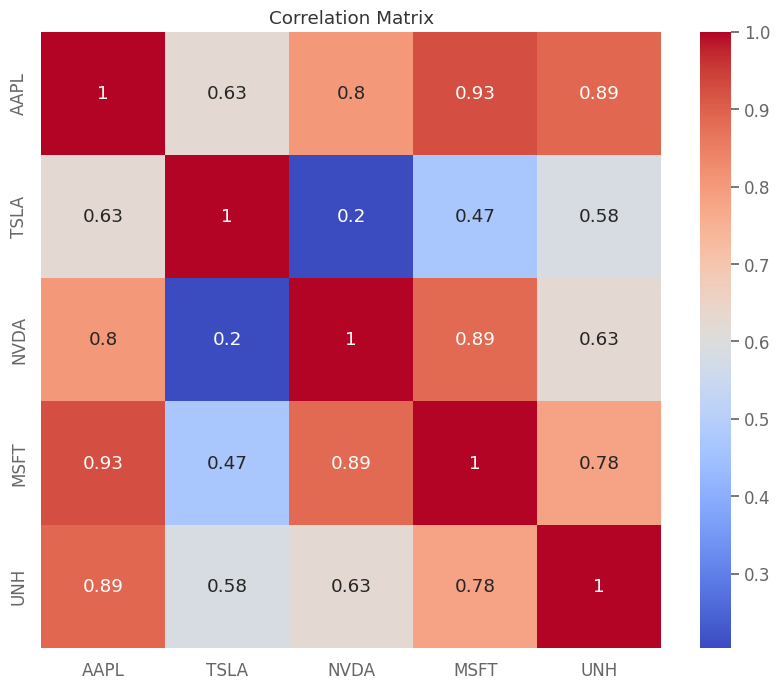

In [18]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Stocks like Microsoft (MSFT), Apple (AAPL), and UnitedHealth (UNH) show strong positive correlations, indicating their returns often move together.
- Tesla (TSLA) has the lowest correlations with other stocks, suggesting it behaves more independently in terms of returns.
- It's important to note that there is not any negative correlation among the assets above, which indicates that none of them acts to limit losses.

### Sharpe Ratio
- The Sharpe ratio measures how much return an investment gives for the risk taken.
- A higher Sharpe ratio means the investment is doing well for the amount of risk, while a lower ratio means it’s not performing as well.
- A Sharpe ratio above 1.0 is good, above 2.0 is very good, and above 3.0 is excellent.

In [19]:
# Calculating Sharpe ratio
print('\n')
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(data['AAPL']).round(2))
print('\n')
print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(data['TSLA']).round(2))
print('\n')
print("Sharpe Ratio for NVDA: ", qs.stats.sharpe(data['NVDA']).round(2))
print('\n')
print("Sharpe Ratio for MSFT: ", qs.stats.sharpe(data['MSFT']).round(2))
print('\n')
print("Sharpe Ratio for UNH: ", qs.stats.sharpe(data['UNH']).round(2))
print('\n')




Sharpe Ratio for AAPL:  0.9


Sharpe Ratio for TSLA:  1.08


Sharpe Ratio for NVDA:  1.45


Sharpe Ratio for MSFT:  0.82


Sharpe Ratio for UNH:  0.7




- AAPL's Sharpe Ratio of 0.9 suggests it's providing lower returns for the amount of risk compared to other stocks.
- TSLA's Sharpe Ratio of 1.1 indicates it offers a decent return relative to its risk, making it a good investment.
- NVDA's Sharpe Ratio of 1.46 shows it provides a strong return for the risk taken, considered very good.
- MSFT's Sharpe Ratio of 0.82 implies its risk-adjusted return is slightly below average, indicating lower performance for the risk.


## Building the portfolio
- To build a portfolio, investors must select a combination of assets that are expected to perform well under different economic and market conditions.



In [20]:
# downloading the S&P 500 to act as the bench mark for our portfolio
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2020-1-1':'2024-11-22']
sp500

,Close
Date,
2020-01-02,0.008379
2020-01-03,-0.007060
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
...,...
2024-11-18,0.003918
2024-11-19,0.003964
2024-11-20,0.000022


In [21]:
## Also downloading our stocks daily return  with qs to align with our benchmark
apple = qs.utils.download_returns('AAPL')
apple = apple.loc['2020-1-1':'2024-11-22']

tesla = qs.utils.download_returns('TSLA')
tesla = tesla.loc['2020-1-1':'2024-11-22']

NVDA = qs.utils.download_returns('NVDA')
NVDA = NVDA.loc['2020-1-1':'2024-11-22']

MSFT = qs.utils.download_returns('MSFT')
MSFT = MSFT.loc['2020-1-1':'2024-11-22']

UNH = qs.utils.download_returns('UNH')
UNH = UNH.loc['2020-1-1':'2024-11-22']

#### Weights
- Refer to the percentage of the total value allocated to each individual asset.The weight assigned to an asset reflects the investor's confidence in the asset's ability to generate returns and their willingness to accept its associated risk.
- Portfolio managers may use various techniques, such as modern portfolio theory and factor-based investing, to determine optimal weightings

In [23]:
# startin at 25% as thw weight
weights = [0.25, 0.25, 0.25, 0.25, 0.25]



portfolio = apple*weights[0] + tesla*weights[1] + NVDA*weights[2] + MSFT*weights[3] + UNH*weights[4]
portfolio # Displaying portfolio's daily returns



,Close
Date,
2020-01-02,0.021102
2020-01-03,-0.004667
2020-01-06,0.010236
2020-01-07,0.007762
2020-01-08,0.026045
...,...
2024-11-18,0.013549
2024-11-19,0.013737
2024-11-20,0.004821


- Creating a report  using quantstats to compare the portfolio's performance and its level of risk with a benchmark, which in this case is the SP500.

In [24]:
# # using full will print out every detail but we will only print out the metrics
# qs.reports.full(portfolio, benchmark=sp500)

qs.reports.metrics(portfolio, benchmark=sp500)



                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2020-01-02   2020-01-02
End Period          2024-11-22   2024-11-22
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   84.76%       983.52%
CAGR﹪              9.05%        39.96%

Sharpe              0.69         1.4
Prob. Sharpe Ratio  93.45%       99.87%
Sortino             0.97         2.03
Sortino/√2          0.69         1.44
Omega               1.28         1.28

Max Drawdown        -33.92%      -48.83%
Longest DD Days     745          522

Gain/Pain Ratio     0.14         0.28
Gain/Pain (1M)      0.78         2.19

Payoff Ratio        0.93         1.01
Profit Factor       1.14         1.28
Common Sense Ratio  1.12         1.37
CPC Index           0.57         0.71
Tail Ratio          0.98         1.07
Outlier Win Ratio   5.55         2.59
Outlier Loss Ratio  5.9          2.96

MTD                 4.63%        14.01%
3M         

##### Key takeaways
- The Cumulative Return of the portfolio is higher than the benchmark, at 983.52% compared to 84.76% for the SP500.
- The Sharpe Ratio and Sortino Ratio of the portfolio are also higher, indicating that it generates better returns for the level of risk taken.
- However, the portfolio's maximum drawdown is greater than the benchmark, at -48.83% compared to -33.92%. This indicates that the portfolio has experienced larger losses at times than the benchmark.

# Optimizing Portfolio
Here we will the

- **Markowitz Mean-Variance Optimization Model** : It is based on the idea that investors should maximize the expected return of a portfolio while minimizing its risk.



## Markowitz Mean-Variance Optimization Model
We are going to use  PyPortfolioOpt  which makes our computation easier.

- There are two key requirements for mean-variance optimization:

1) Expected returns for each of the assets in the portfolio.

2) A risk model that quantifies the level of risk in each asset.The most commonly used risk model is the covariance matrix, which describes the volatilities of assets and the degree to which they are co-dependent.

In [25]:
data.head()

,AAPL,TSLA,NVDA,MSFT,UNH
Date,,,,,
2020-01-02,72.796028,28.684000,5.973121,153.630707,272.817413
2020-01-03,72.088303,29.534000,5.877517,151.717712,270.056641
2020-01-06,72.662697,30.102667,5.902164,152.109879,271.931427
2020-01-07,72.320984,31.270666,5.973620,150.722961,270.289856
2020-01-08,73.484344,32.809334,5.984824,153.123795,275.988708


In [26]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
Mean = expected_returns.mean_historical_return(data) #expected returns
covariance = risk_models.sample_cov(data) #Covariance matrix

In [27]:
Mean

,0
AAPL,0.268273
TSLA,0.656159
NVDA,0.894197
MSFT,0.227470
UNH,0.177099


In [28]:
covariance

,AAPL,TSLA,NVDA,MSFT,UNH
AAPL,0.101839,0.103869,0.105361,0.073322,0.040448
TSLA,0.103869,0.452583,0.171715,0.091631,0.041226
NVDA,0.105361,0.171715,0.293958,0.113869,0.046777
MSFT,0.073322,0.091631,0.113869,0.094055,0.040696
UNH,0.040448,0.041226,0.046777,0.040696,0.087946


- The PyPortfolioOpt library provides the EfficientFrontier class which wiil be used to determine the weights

In [29]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(Mean,covariance) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('AAPL', 0.0),
             ('TSLA', 0.10742),
             ('NVDA', 0.84251),
             ('MSFT', 0.0),
             ('UNH', 0.05007)])

- 84.251% was give to NVDA and 10.742% to TESLA and UNH 5.007% while APPLE and MSFT  got 0.This might be due to the correlation of the assets as seen in the correlation matrix above


In [30]:
# Creating new portfolio with optimized weights
new_weights = [0.10742, 0.84251, 0.05007]
optimized_portfolio = tesla*new_weights[0] + NVDA*new_weights[1] + UNH*new_weights[2]
optimized_portfolio # Visualizing daily returns

,Close
Date,
2020-01-02,0.019318
2020-01-03,-0.010809
2020-01-06,0.005949
2020-01-07,0.014066
2020-01-08,0.007921
...,...
2024-11-18,-0.005042
2024-11-19,0.042467
2024-11-20,-0.005612


In [31]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.metrics(optimized_portfolio, benchmark = portfolio)

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2020-01-02   2020-01-02
End Period          2024-11-22   2024-11-22
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   983.52%      2,160.73%
CAGR﹪              39.96%       55.27%

Sharpe              1.4          1.53
Prob. Sharpe Ratio  99.87%       99.97%
Sortino             2.03         2.35
Sortino/√2          1.44         1.67
Omega               1.3          1.3

Max Drawdown        -48.83%      -61.68%
Longest DD Days     522          541

Gain/Pain Ratio     0.28         0.3
Gain/Pain (1M)      2.19         2.36

Payoff Ratio        1.02         1.03
Profit Factor       1.28         1.3
Common Sense Ratio  1.37         1.49
CPC Index           0.72         0.73
Tail Ratio          1.07         1.15
Outlier Win Ratio   4.02         3.18
Outlier Loss Ratio  4.07         3.23

MTD                 14.01%       10.36%
3M         

### Key takeaways
 - Cumulative Return: The optimized portfolio has generated a significantly higher cumulative return of  2,160% compared to 983.52% for the original portfolio. This means that the an investment in the optimized portfolio would have provided higher earnings for investors compared to the original portfolio.
 - CAGR: The compounded annual growth rate (CAGR) of the optimized portfolio is higher at 55.27% compared to 39.96% for the original portfolio. This suggests that the optimized portfolio has generated a higher rate of return per year over the entire investment period.
 - Sharpe Ratio: The optimized portfolio has a slightly higher Sharpe ratio of  1.53 compared to 1.4 for the original portfolio, indicating that it has generated a better risk-adjusted return.

- The maximum drawdown for the optimized portfolio is higher  at -61.68% compared to -48.83% for the original portfolio. This means that the optimized portfolio experienced higher losses during the worst period of performance.






# Conclusion
 Portfolio optimization is a very important step to improve the risk-return relationship of a portfolio by adjusting its asset allocation. By using various mathematical models and optimization techniques, it's possible to efficiently improve performance and reduce the exposure to risk.


While there are different approaches to portfolio optimization, including the Markowitz Mean-Variance model and the Black-Litterman allocation model, there is no one-size-fits-all solution. The choice of the model to use depends on the investor's risk tolerance, investment goals, and overall market conditions.